# Smoking: Good or Bad? 

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
#Set working directory using relative path
os.chdir('..\\data')

In [3]:
df = pd.read_csv("smoking.csv")
df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


# Step 0: Data Preprocessing

Let's make sure that our dataset is clean before we analyse.

TODO: create a new dataframe with columns `is_smoker` and `is_alive` containing `int` or `bool` values.
We do this because they make our calculations easier later on when we will perform calculations (aggregate) over them.

In [5]:
def clean_dataframe(dataf):
    ## TODO: return a dataframe with columns `is_smoker` and `is_alive` 
    ## containing `int` or `bool` indicator values for respectively the 'smoker' and 'outcome' column
    return dataf.assign(
        is_alive=lambda d: d['outcome'] == 'Alive',
        is_smoker=lambda d: d['smoker'] == 'Yes'
    )

clean_df = df.pipe(clean_dataframe)
clean_df.head()

,outcome,smoker,age,is_alive,is_smoker
0,Alive,Yes,23,True,True
1,Alive,Yes,18,True,True
2,Dead,Yes,71,False,True
3,Alive,No,67,True,False
4,Alive,No,64,True,False


# Question 1: what is the probability to live after 20 years, for smokers and non-smokers?

Now that the dataset is clean, the analysis can begin!

In [6]:
def calc_prob_to_live(dataf):
    ## TODO: Calculate the probability to live for smokers and non-smokers.
    ## You can use the indicator columns created above to perform math (a np.mean for each group should work wonders)
    aggregated_df = (dataf
                     .groupby('smoker')
                     .agg(probability_to_live_in_20_years=('is_alive', np.mean))
                    )
    return aggregated_df

prob_to_live_df = clean_df.pipe(calc_prob_to_live)
prob_to_live_df.head()

,probability_to_live_in_20_years
smoker,
No,0.685792
Yes,0.761168


---

# Question 2: What? Why? 

Let's see if we can explain why, in our analysis above, smokers seem to have a larger survival rate than non-smokers 

### Effect of Age 

It might be that your age actually has a very large effect on the probability that you will be alive in 20 years or not. Lets quantify that. 

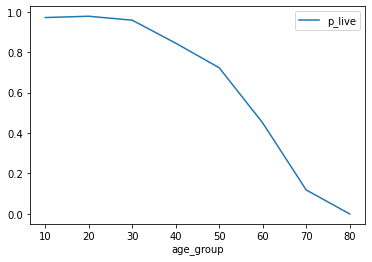

In [17]:
def calc_effect_of_age(dataf):
    # TODO: Transform the data here in such a way that we can plot
    # the effect of age on the probability to live easily.
    # I recommend to bin/group the age column per 10 years, 
    # so that you have more values for each age group. 
    aggregated_df = (dataf
                     .assign(age_group=lambda d: np.floor(d['age'] / 10) * 10)
                     .groupby('age_group')
                     .agg(p_live=('is_alive', np.mean))
                    )
    return aggregated_df

age_effect_df = calc_effect_of_age(clean_df)

# TODO: Plot the probability to live over the age in a linechart
# y axis: probability to live
# x axis: age (bundled in 'bins' of 10 years)
age_effect_df.head()
age_effect_df.plot();

---

# Question 3: How does this age effect quantify for smokers and non-smokers?

In our answer on question two, we can see that the probability to live in 20 years decreases once you gets older. That makes sense. 

But how does that differ for smokers and non-smokers?

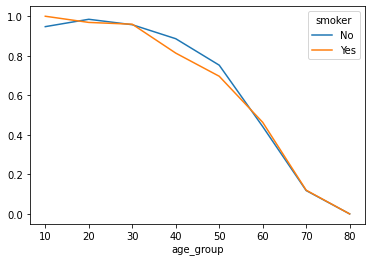

In [18]:
def calc_effect_of_age2(dataf):
    # TODO: Transform the data here in such a way that we can plot
    # the effect of age on the probability to live easily.
    # This time, let's make a line chart for both the smokers and the non-smokers
    # I recommend to bin/group the age column per 10 years, 
    # so that you have more values for each age group.  
    aggregated_df = (dataf
                     .assign(age_group=lambda d: np.floor(d['age'] / 10) * 10)
                     .groupby(['smoker', 'age_group'])
                     .agg(p_live = ('is_alive', np.mean))
                     .reset_index()
                     .pivot(index='age_group', columns='smoker', values='p_live')
                    )
    return aggregated_df


age_effect_smoke_vs_nonsmoke = calc_effect_of_age2(clean_df)

# TODO: Plot the probability to live over the age in a linechart
# y axis: probability to live
# x axis: age (bundled in 'bins' of 10 years)
# lines: 1 for smokers, 1 for non-smokers
age_effect_smoke_vs_nonsmoke.plot();


In [19]:
age_effect_smoke_vs_nonsmoke.head(15)

smoker,No,Yes
age_group,,
10.0,0.947368,1.000000
20.0,0.984615,0.968750
30.0,0.957143,0.959677
40.0,0.886364,0.813559
50.0,0.752475,0.696429
60.0,0.441860,0.463415
70.0,0.118280,0.120000
80.0,0.000000,0.000000


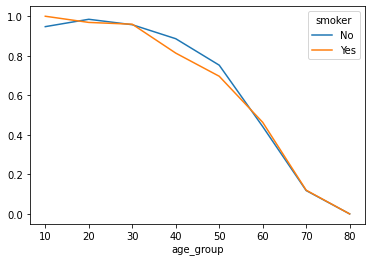

In [20]:
age_effect_smoke_vs_nonsmoke.plot();

---

# Question 4: What is the benefit of not smoking for different age groups?
i.e.: 
 - What is the probability to live for smokers for different age groups (e.g. 20s, 30s, ... 80s)
   - you can obtain this data from question 4
 - What is the probability to live for non-smokers for different age groups (e.g. 20s, 30s, ... 80s)
   - you can obtain this data from question 4
 - What is the difference in this probabilty for different age groups (e.g. 20s, 30s, ... 80s)
   - **TODO: calculate this**

In [21]:
## TODO: write the code in this cell and output a table/plot that shows the mentioned difference
(age_effect_smoke_vs_nonsmoke
 .assign(diff=lambda d: d['No'] - d['Yes'])
)

smoker,No,Yes,diff
age_group,,,
10.0,0.947368,1.000000,-0.052632
20.0,0.984615,0.968750,0.015865
30.0,0.957143,0.959677,-0.002535
40.0,0.886364,0.813559,0.072804
50.0,0.752475,0.696429,0.056047
60.0,0.441860,0.463415,-0.021554
70.0,0.118280,0.120000,-0.001720
80.0,0.000000,0.000000,0.000000


---

# Conclusion: Is smoking good or bad for your probability to live in 20 years??

In [ ]:
# TODO Explain in 2 or three sentences
# ...